In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('insurance_claims2.csv')  # Pas besoin de chemin relatif

df= data.drop(['_c39', 'auto_year', 'auto_model', 'insured_zip','insured_sex', 'policy_csl', 'policy_bind_date','policy_number','insured_education_level','policy_state', 'months_as_customer',
                 'insured_hobbies','incident_city','bodily_injuries','incident_location','number_of_vehicles_involved','witnesses','auto_make','capital-gains','capital-loss','authorities_contacted'], axis=1)
df =df.rename(columns={'auto_make': 'auto_marke'})
df = df.applymap(lambda x: ' '.join(x.split()).lower() if isinstance(x, str) else x)
df.fillna('unknown', inplace=True)
df.replace('?', 'unknown', inplace=True)
print(df.shape)
display(df)
#display(new_df.head())

(1000, 19)


,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,insured_relationship,incident_date,incident_type,collision_type,incident_severity,incident_state,incident_hour_of_the_day,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,1000,1406.91,0,craft-repair,husband,2015-01-25,single vehicle collision,side collision,major damage,sc,5,yes,yes,71610,6510,13020,52080,y
1,42,2000,1197.22,5000000,machine-op-inspct,other-relative,2015-01-21,vehicle theft,unknown,minor damage,va,8,unknown,unknown,5070,780,780,3510,y
2,29,2000,1413.14,5000000,sales,own-child,2015-02-22,multi-vehicle collision,rear collision,minor damage,ny,7,no,no,34650,7700,3850,23100,n
3,41,2000,1415.74,6000000,armed-forces,unmarried,2015-01-10,single vehicle collision,front collision,major damage,oh,5,unknown,no,63400,6340,6340,50720,y
4,44,1000,1583.91,6000000,sales,unmarried,2015-02-17,vehicle theft,unknown,minor damage,ny,20,no,no,6500,1300,650,4550,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,1000,1310.80,0,craft-repair,unmarried,2015-02-22,single vehicle collision,front collision,minor damage,nc,20,yes,unknown,87200,17440,8720,61040,n
996,41,1000,1436.79,0,prof-specialty,wife,2015-01-24,single vehicle collision,rear collision,major damage,sc,23,yes,unknown,108480,18080,18080,72320,n
997,34,500,1383.49,3000000,armed-forces,other-relative,2015-01-23,multi-vehicle collision,side collision,minor damage,nc,4,unknown,yes,67500,7500,7500,52500,n
998,62,2000,1356.92,5000000,handlers-cleaners,wife,2015-02-26,single vehicle collision,rear collision,major damage,ny,2,unknown,yes,46980,5220,5220,36540,n


In [3]:
import pandas as pd

# Load the dataset
file_path = "insurance_claims2.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Top 5 cities with most incidents
top_cities = df['incident_state'].value_counts().head(5)
print("Top 5 Cities with Most Incidents:")
print(top_cities)

# Group ages into brackets (5 equal bins)
df['age_bracket'] = pd.cut(df['age'], bins=5, labels=["18-27", "28-37", "38-47", "48-57", "58+"])

# Count incidents by age bracket
age_bracket_counts = df['age_bracket'].value_counts().sort_index()
print("\nIncidents by Age Bracket:")
print(age_bracket_counts)

# Find most and least affected age brackets
most_affected = age_bracket_counts.idxmax()
least_affected = age_bracket_counts.idxmin()
print(f"\nThe most affected age bracket is: {most_affected}")
print(f"The least affected age bracket is: {least_affected}")


Top 5 Cities with Most Incidents:
NY    262
SC    248
WV    217
VA    110
NC    110
Name: incident_state, dtype: int64

Incidents by Age Bracket:
18-27    120
28-37    345
38-47    345
48-57    126
58+       64
Name: age_bracket, dtype: int64

The most affected age bracket is: 28-37
The least affected age bracket is: 58+


### top cities with the most incidents and the incident type for each city per our 

Top 5 Cities with Most Incidents:
['NY', 'SC', 'WV', 'VA', 'NC']

Incident Analysis by City and Hour:


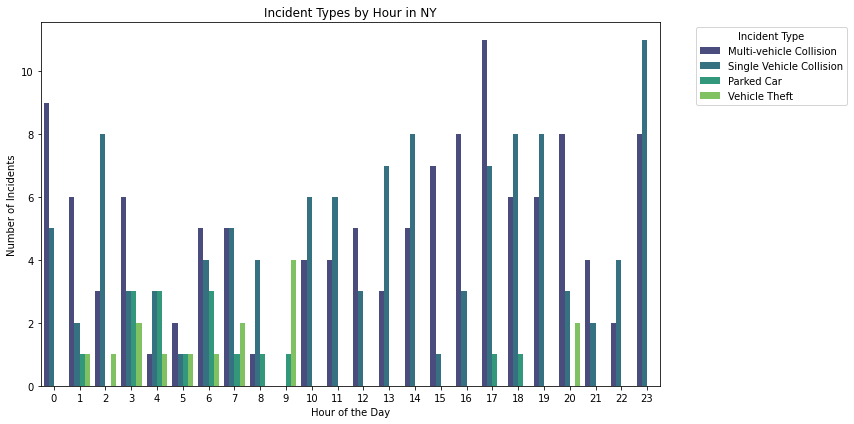

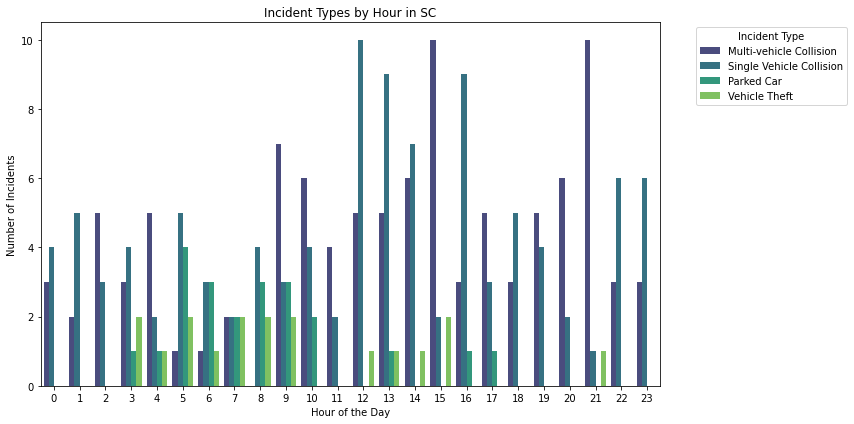

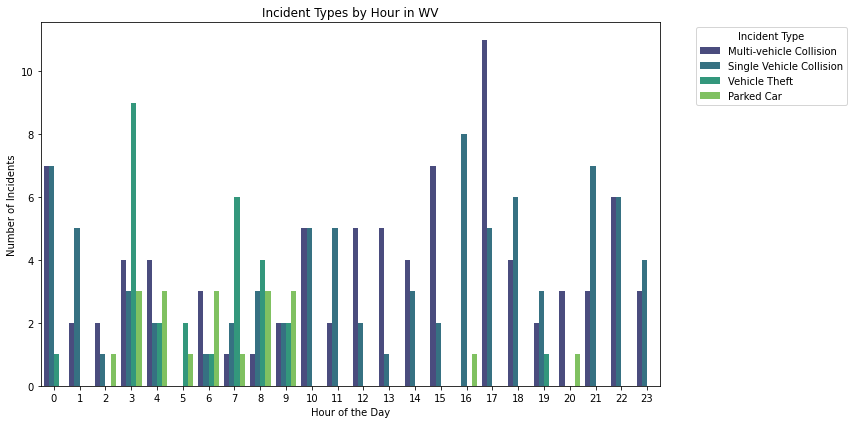

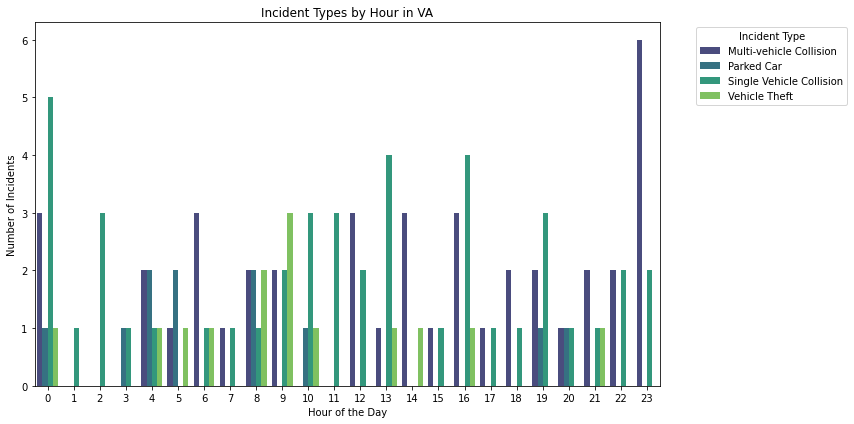

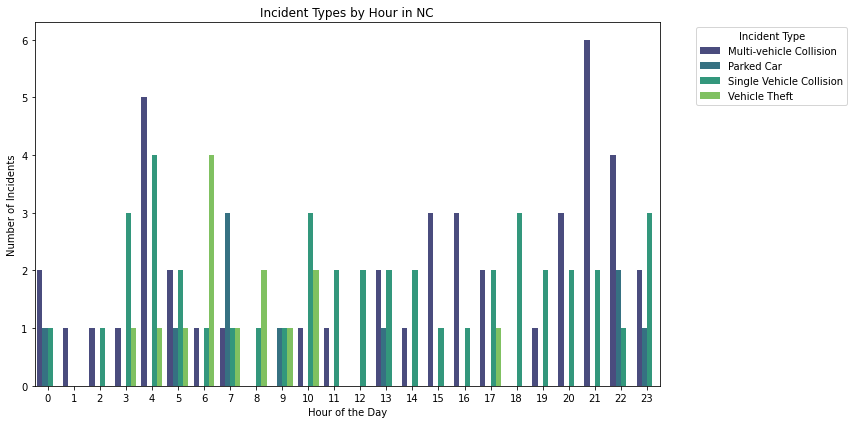

In [4]:
# Step 1: Identify the Top 5 Cities with Most Incidents
top_cities = df['incident_state'].value_counts().head(5).index.tolist()
print("Top 5 Cities with Most Incidents:")
print(top_cities)

# Step 2: Filter Data for Top 5 Cities
filtered_df = df[df['incident_state'].isin(top_cities)]

# Step 3: Group Data by City, Hour, and Incident Type
incident_analysis = (
    filtered_df.groupby(['incident_state', 'incident_hour_of_the_day', 'incident_type'])
    .size()
    .reset_index(name='count')
)

# Sort by city and hour for better readability
incident_analysis = incident_analysis.sort_values(by=['incident_state', 'incident_hour_of_the_day'])

print("\nIncident Analysis by City and Hour:")


# Step 4: Visualize Incident Types by Hour for Each City
for city in top_cities:
    city_data = incident_analysis[incident_analysis['incident_state'] == city]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=city_data,
        x='incident_hour_of_the_day',
        y='count',
        hue='incident_type',
        palette="viridis"
    )
    plt.title(f"Incident Types by Hour in {city}")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Incidents")
    plt.legend(title="Incident Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


### Fraud percentages by cities

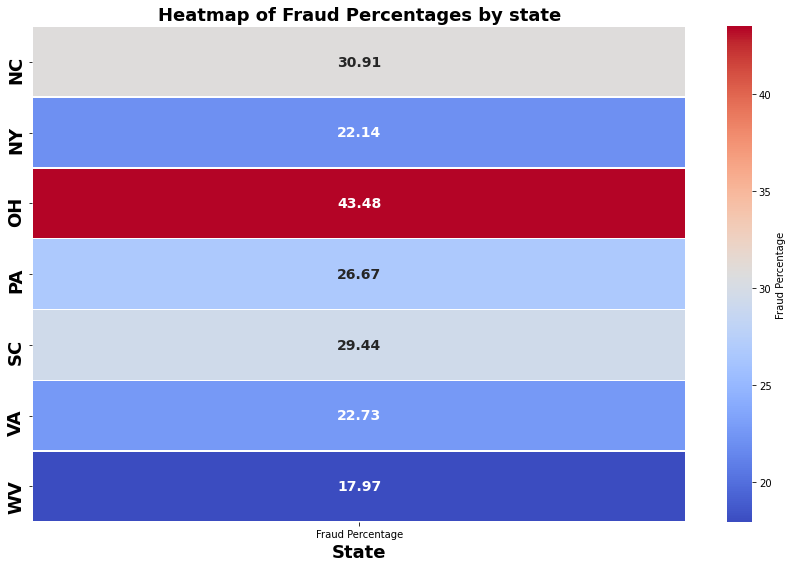

In [5]:
# Calculate fraud percentage for each city
state_fraud = df[df['fraud_reported'] == 'Y'].groupby('incident_state').size()
state_total = df.groupby('incident_state').size()
fraud_percentage_by_state = (state_fraud / state_total * 100).fillna(0)

# Prepare data for heatmap visualization
heatmap_data = pd.DataFrame({
    'State': fraud_percentage_by_state.index,
    'Fraud Percentage': fraud_percentage_by_state.values
}).sort_values(by='Fraud Percentage', ascending=False)

# Create heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data.pivot_table(values='Fraud Percentage', index='State'),
    annot=True,  cmap='coolwarm',  fmt='.2f', linewidths=0.5,cbar_kws={'label': 'Fraud Percentage'},  # Add color bar label
    annot_kws={'size': 14, 'fontweight': 'bold'}  # Adjust annotation font size and make bold
)

plt.title('Heatmap of Fraud Percentages by state', fontsize=18, fontweight='bold')
plt.xlabel('State',fontsize=18, fontweight='bold')
plt.ylabel('')

# Adjust y-axis tick label size (state names)
plt.yticks(fontsize=18, fontweight='bold')  # Increase font size for state names
plt.tight_layout()
plt.show()



incident_city
Arlington      0.289474
Columbus       0.261745
Hillsdale      0.248227
Springfield    0.242038
Northbend      0.234483
Riverwood      0.223881
Northbrook     0.221311
dtype: float64


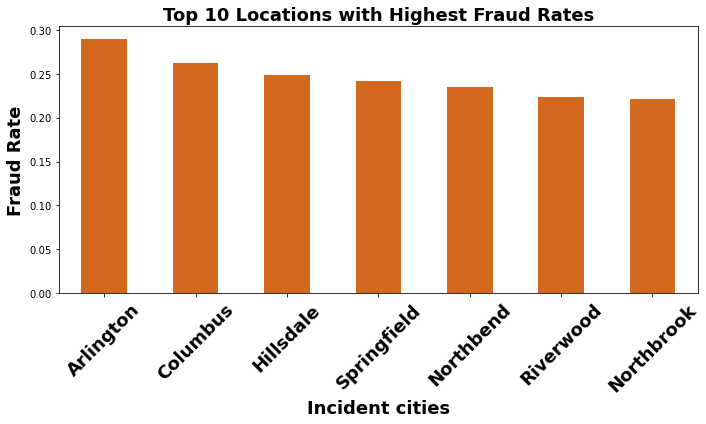

In [6]:
# Calculate fraud counts and rates by location
location_fraud = df[df['fraud_reported'] == 'Y'].groupby('incident_city').size()
location_total = df.groupby('incident_city').size()
fraud_rate_by_location = (location_fraud / location_total).sort_values(ascending=False)

# Get top 10 locations with highest fraud rates
top_10_locations = fraud_rate_by_location.head(10)
print(top_10_locations)

import matplotlib.pyplot as plt

# Plot top 10 locations with highest fraud rates
top_10_locations.plot(kind='bar', color='chocolate', figsize=(10, 6))
plt.title('Top 10 Locations with Highest Fraud Rates',fontsize=18, fontweight='bold')
plt.xlabel('Incident cities',fontsize=18, fontweight='bold')
plt.ylabel('Fraud Rate',fontsize=18, fontweight='bold')
plt.xticks(rotation=45,fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


### Policy Features vs. Fraud: Do policy features like policy deductable or umbrella limit correlate with fraud (fraud_reported)?

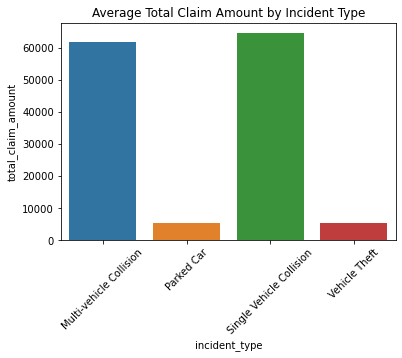

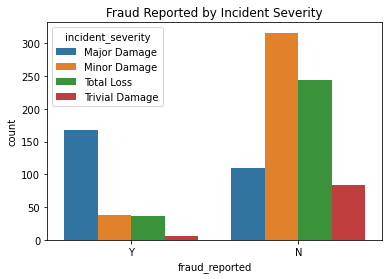

In [7]:

# Average claim amount by incident type
avg_claim_by_incident = df.groupby("incident_type")["total_claim_amount"].mean().reset_index()

# Bar plot
sns.barplot(data=avg_claim_by_incident, x="incident_type", y="total_claim_amount")
plt.title("Average Total Claim Amount by Incident Type")
plt.xticks(rotation=45)
plt.show()


# Count plot of fraud reported vs incident severity
sns.countplot(data=df, x="fraud_reported", hue="incident_severity")
plt.title("Fraud Reported by Incident Severity")
plt.show()

### Fraud detection analysis

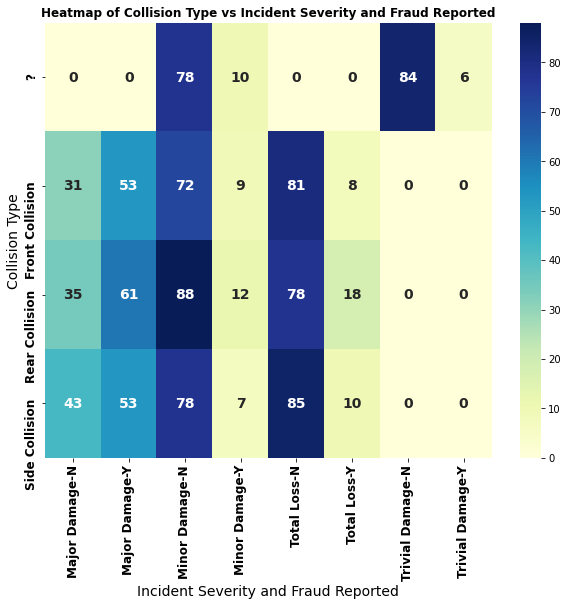

In [8]:
# Create a crosstab for correlation between variables
heatmap_data = pd.crosstab(df['collision_type'], [df['incident_severity'], df['fraud_reported']])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu",annot_kws={"size": 14, "fontweight": "bold"})
plt.title('Heatmap of Collision Type vs Incident Severity and Fraud Reported',fontsize=12, fontweight='bold')
plt.xlabel('Incident Severity and Fraud Reported', fontsize=14)
plt.ylabel('Collision Type', fontsize=14)

plt.xticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


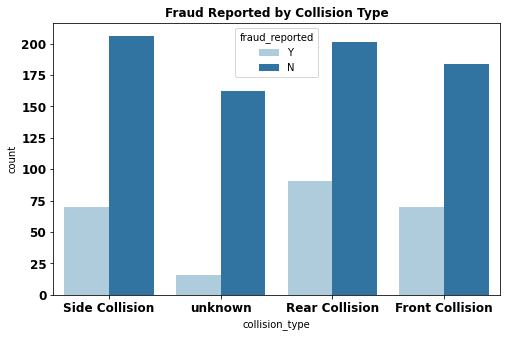

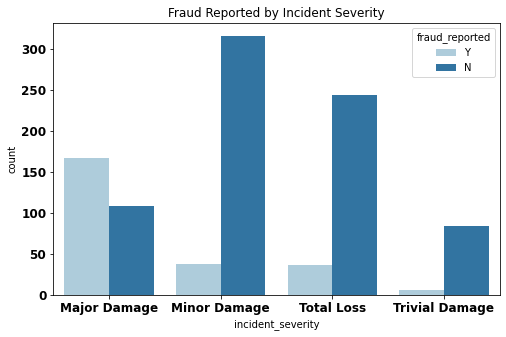

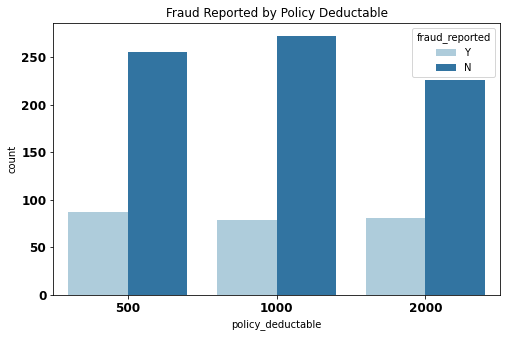

In [31]:
# Plot fraud reported by collision type
df.replace('?', 'unknown', inplace=True)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='collision_type', hue='fraud_reported', palette='Paired')
plt.title('Fraud Reported by Collision Type',fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

# Plot fraud reported by incident severity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='incident_severity', hue='fraud_reported', palette='Paired')
plt.title('Fraud Reported by Incident Severity')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

# Plot fraud reported by policy deductible
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='policy_deductable', hue='fraud_reported', palette='Paired')
plt.title('Fraud Reported by Policy Deductable')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()


### claims optimization

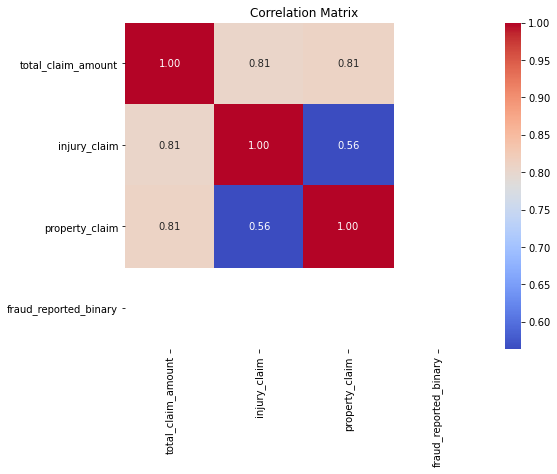

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'fraud_reported' to binary
df['fraud_reported_binary'] = df['fraud_reported'].apply(lambda x: 1 if x == 'Yes' else 0)

# Correlation matrix for numerical columns
correlation_matrix = df[['total_claim_amount', 'injury_claim', 'property_claim', 'fraud_reported_binary']].corr()

# Visualize correlation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
#We can use box plots or bar charts to compare the distribution of claim amounts (e.g., total_claim_amount) for fraudulent and non-fraudulent claims.

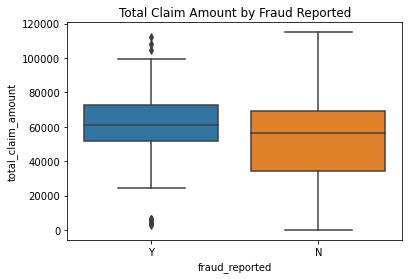

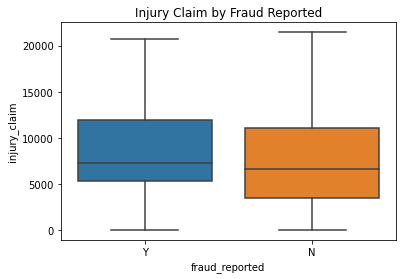

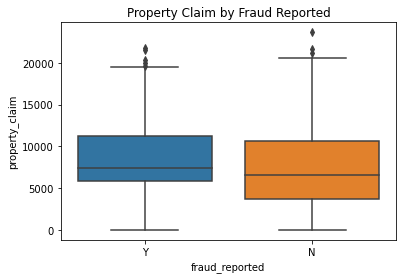

In [58]:
#Visualizing claims vs Fraud
# Box plot for total claim amount vs fraud reported
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Total Claim Amount by Fraud Reported')
plt.show()

# Box plot for injury claim vs fraud reported
sns.boxplot(x='fraud_reported', y='injury_claim', data=df)
plt.title('Injury Claim by Fraud Reported')
plt.show()

# Box plot for property claim vs fraud reported
sns.boxplot(x='fraud_reported', y='property_claim', data=df)
plt.title('Property Claim by Fraud Reported')
plt.show()


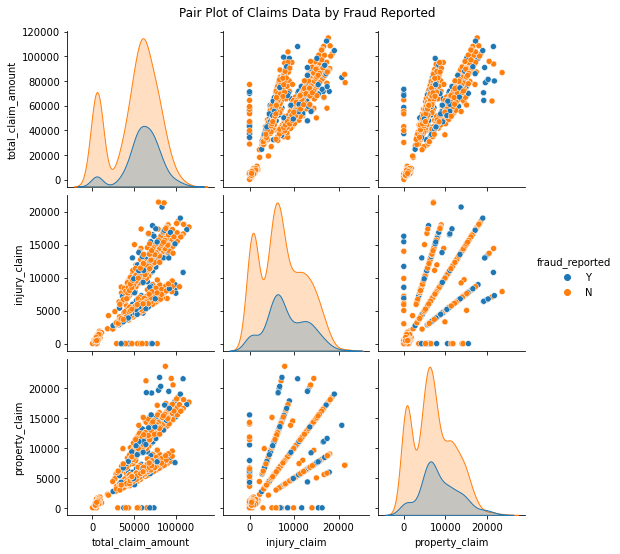

In [13]:
# Pair plot to visualize relationships between claims and fraud reported
sns.pairplot(df, vars=['total_claim_amount', 'injury_claim', 'property_claim'], hue='fraud_reported')
plt.suptitle('Pair Plot of Claims Data by Fraud Reported', y=1.02)
plt.show()


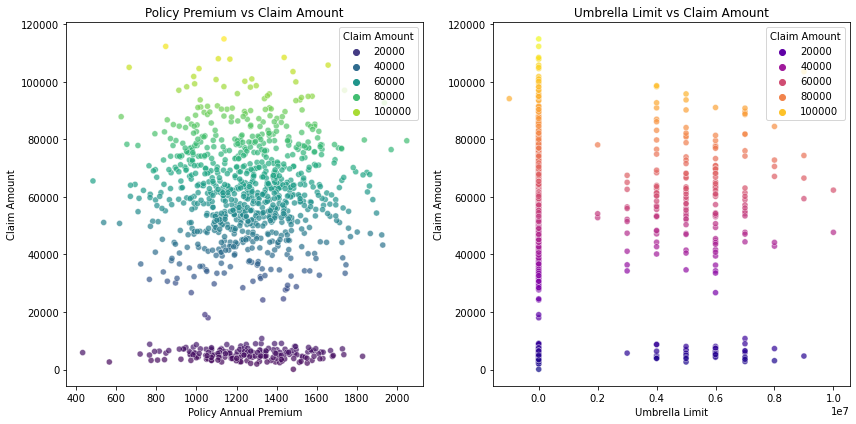

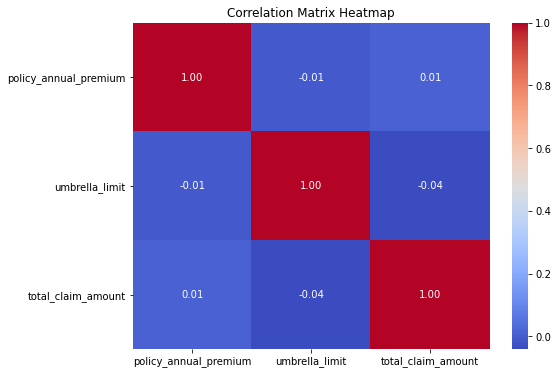

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plots
plt.figure(figsize=(12, 6))

# Scatter Plot 1: Policy Premium vs Claim Amount
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df['policy_annual_premium'], 
    y=df['total_claim_amount'], 
    hue=df['total_claim_amount'],  # Add color based on claim amount
    palette='viridis',            # Use a visually appealing color palette
    alpha=0.7                     # Add some transparency for better visibility
)
plt.title('Policy Premium vs Claim Amount')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Claim Amount')
plt.legend(title='Claim Amount', loc='upper right')

# Scatter Plot 2: Umbrella Limit vs Claim Amount
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df['umbrella_limit'], 
    y=df['total_claim_amount'], 
    hue=df['total_claim_amount'],  # Add color based on claim amount
    palette='plasma',             # Use another color palette for variety
    alpha=0.7                     # Add transparency
)
plt.title('Umbrella Limit vs Claim Amount')
plt.xlabel('Umbrella Limit')
plt.ylabel('Claim Amount')
plt.legend(title='Claim Amount', loc='upper right')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Correlation Analysis with Heatmap
correlation_matrix = df[['policy_annual_premium', 'umbrella_limit', 'total_claim_amount']].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,                # Display correlation values on the heatmap
    cmap='coolwarm',           # Use a diverging color palette for better contrast
    fmt='.2f',                 # Format numbers to two decimal places
    cbar=True                  # Show color bar for reference
)
plt.title('Correlation Matrix Heatmap')
plt.show()



### fraud reported by age

### relation between age , educationlevel, occupations asssocieted with higher amounts

In [15]:
#Compare columns like age and insured_occupation with total_claim_amount.

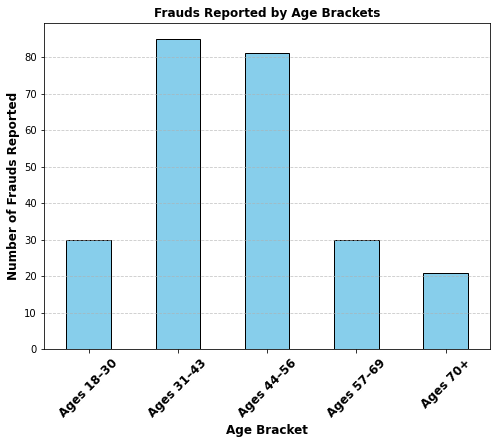

In [39]:

# Group ages into 5 equal brackets
df['age_bracket'] = pd.cut(df['age'], bins=5, labels=['Ages 18–30', 'Ages 31–43', 'Ages 44–56', 'Ages 57–69', 'Ages 70+'])

# Count fraud cases ('Y') per age bracket
fraud_counts = df[df['fraud_reported'] == 'Y'].groupby('age_bracket').size()

# Plot the results
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frauds Reported by Age Brackets',fontsize=12, fontweight='bold')
plt.xlabel('Age Bracket',fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds Reported',fontsize=12, fontweight='bold')
plt.xticks(rotation=45,fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

